# Project 4

Description:
1. Examine `arcene` dataset
2. Find best feature selection methods
3. Find most accurate models
4. Combine them to achive highest possible accuracy (score)

Evaluation of models:
1. Accuracy
2. Number of features
3. Performance score combininig both accuracy and number of selected features. Formula : $\text{score} = \text{accuracy} - 0.01 \times \lvert 0.01 \times \text{n\_features} - 1 \rvert$

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [8]:
def prepare_plot(csv_file_path, selection_method_name):
    df = pd.read_csv(csv_file_path)
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(30, 8))
    classifiers = df['Classifier'].unique()
    for i, classifier in enumerate(classifiers):
        ax[0].plot(df[df['Classifier'] == classifier]['Number_of_Features'], df[df['Classifier'] == classifier]['Accuracy'], label=classifier, marker='o', linestyle='--', linewidth=3)
        ax[1].plot(df[(df['Classifier'] == classifier) & (df['Number_of_Features'] <= 1000)]['Number_of_Features'], df[(df['Classifier'] == classifier) & (df['Number_of_Features'] <= 1000)]['Performance_score'], label=classifier, marker='o', linestyle='--', linewidth=3)
    ax[0].set_xlabel('Number of features')
    ax[0].set_ylabel('Accuracy')
    ax[1].set_xlabel('Number of features')
    ax[1].set_xlabel('Performance score')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'Accuracy of classifiers with {selection_method_name}')
    ax[1].set_title(f'Performance score of classifiers with {selection_method_name}')

# Comparison of Best methods

In [74]:
best_results = pd.DataFrame(columns=['Selector', 'Classifier', 'Number_of_Features', 'Accuracy', 'Performance_score'])
for file in os.listdir('data'):
    df = pd.read_csv(f'data/{file}')
    df = df[['Selector', 'Classifier', 'Number_of_Features', 'Accuracy', 'Performance_score']][df['Performance_score'] == df['Performance_score'].max()].iloc[0]
    best_results = pd.concat([best_results, pd.DataFrame(df).T])
    
best_results = best_results.reset_index(drop=True)

In [76]:
best_results.to_csv('best_results.csv', index=False)
best_results

,Selector,Classifier,Number_of_Features,Accuracy,Performance_score
0,SelectKBest_f_classif,SVC_rbf,100,0.73,0.73
1,BorutaPy,SVC_rbf,29,0.74,0.7329
2,SelectKBest_chi2,LogisticRegression,1000,0.86,0.77
3,CorrelationSelector,SVC_rbf,100,0.73,0.73
4,ElasticNet,ElasticNet,411,0.412359,0.3813
5,EnsembleSelector,LogisticRegression,414,0.77,0.7386
6,RandomForestSelector,SVC_linear,100,0.78,0.78
7,Lasso,Lasso,142,0.75,0.7458
8,MutualInformationSelector,DecisionTreeClassifier,50,0.79,0.785
9,PCA,LogisticRegression,50,0.86,0.855


1. Overall the best mehod was combining `PCA` with `logistic regression` model. Not only it achieved very high accuracy of 86 %, but also selected small number of 50 features. Therefore, it also had the highest performance score (score considering number of features and accuracy together)
2. `Ensemble` and `stack` (`list` in the table) methods were not as good as expected, achieving scores around 0.77, which is average.

# PCA

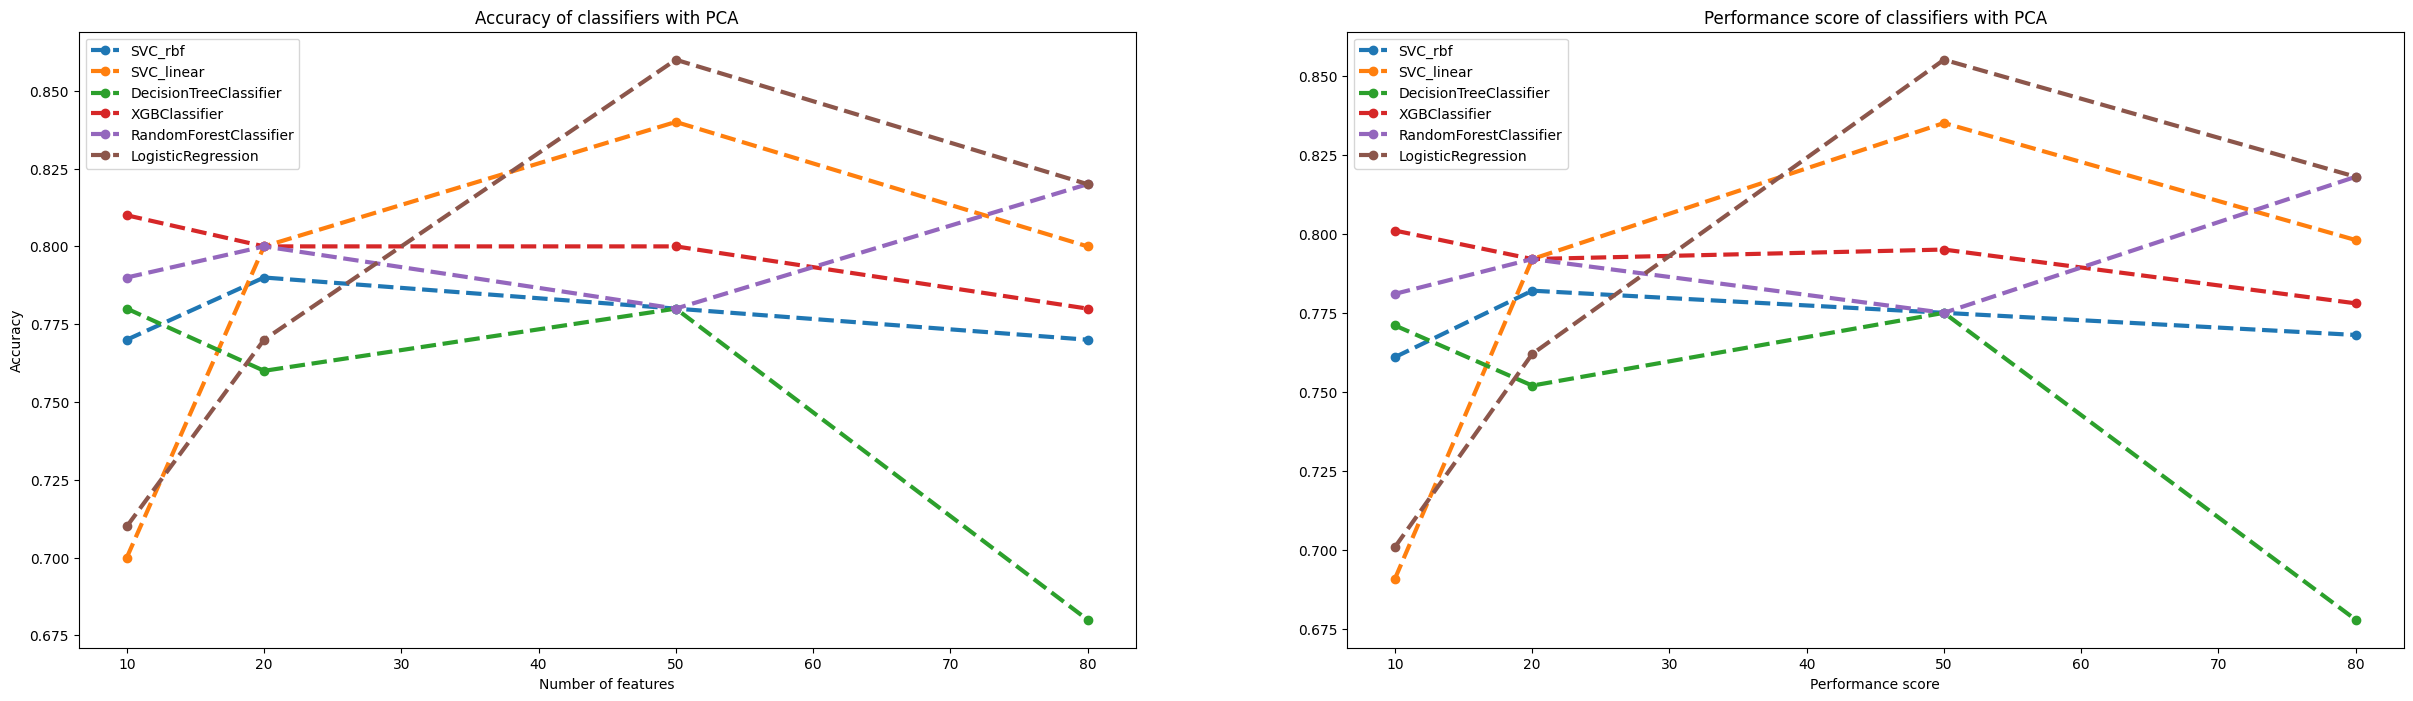

In [9]:
prepare_plot('data/pca.csv', 'PCA')

PCA gives very good results for all classifiers, comparing with other feature seleciton methods. Moreover, it is quite stable with respect to increasing number of features. It is also one of the fastest methods out of all, which makes it a very good choice for feature selection.

# Lasso

Text(0.5, 1.0, 'Accuracy and performance score of Lasso with different regularization strengths')

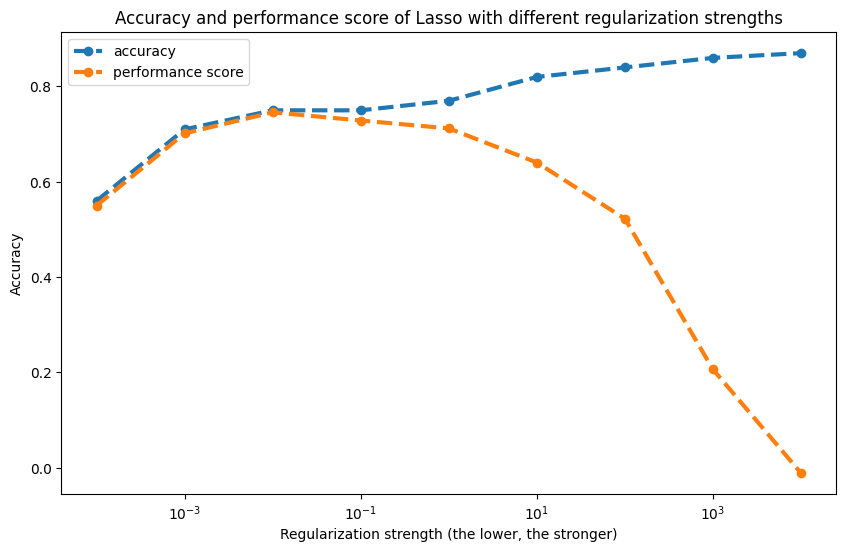

In [35]:
lasso = pd.read_csv('data/lasso.csv')
fig= plt.figure(figsize=(10, 6))
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.plot(alphas, lasso['Accuracy'], label='accuracy', marker='o', linestyle='--', linewidth=3)
plt.plot(alphas, lasso['Performance_score'], label='performance score', marker='o', linestyle='--', linewidth=3)
plt.xlabel('Regularization strength (the lower, the stronger)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.title('Accuracy and performance score of Lasso with different regularization strengths')

As the regularization gets weaker, the prediction of lasso classifier increases. Unfortunately, it also means that more features are selected and the overall score considering accuracy and number of features decreases greatly.

In [ ]:
# lasso = pd.read_csv('data/lasso.csv')
# elasticNet = pd.read_csv('data/elasticNet.csv')
# l1_ratios = elasticNet['l1_ratio'].unique()
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
# alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# ax[0].plot(alphas, lasso['Accuracy'], label='Lasso', marker='o', linestyle='--', linewidth=3)
# for l1_ratio in l1_ratios:
#     ax[0].plot(alphas, elasticNet[elasticNet['l1_ratio'] == l1_ratio]['Accuracy'], label=f'ElasticNet l1_ratio={l1_ratio}', marker='o', linestyle='--', linewidth=3)
# ax[1].plot(alphas, lasso['Performance_score'], label='Lasso', marker='o', linestyle='--', linewidth=3)
# for l1_ratio in l1_ratios:
#     ax[1].plot(alphas, elasticNet[elasticNet['l1_ratio'] == l1_ratio]['Performance_score'], label=f'ElasticNet l1_ratio={l1_ratio}', marker='o', linestyle='--', linewidth=3)
# ax[0].set_xlabel('Number of features')
# ax[0].set_ylabel('Accuracy')
# ax[1].set_xlabel('Number of features')
# ax[1].set_xlabel('Performance score')
# ax[0].legend()
# ax[1].legend()
# ax[0].set_title(f'Accuracy of elasticNet and lasso')
# ax[1].set_title(f'Performance score of elasticNet and lasso')

# Random Forest

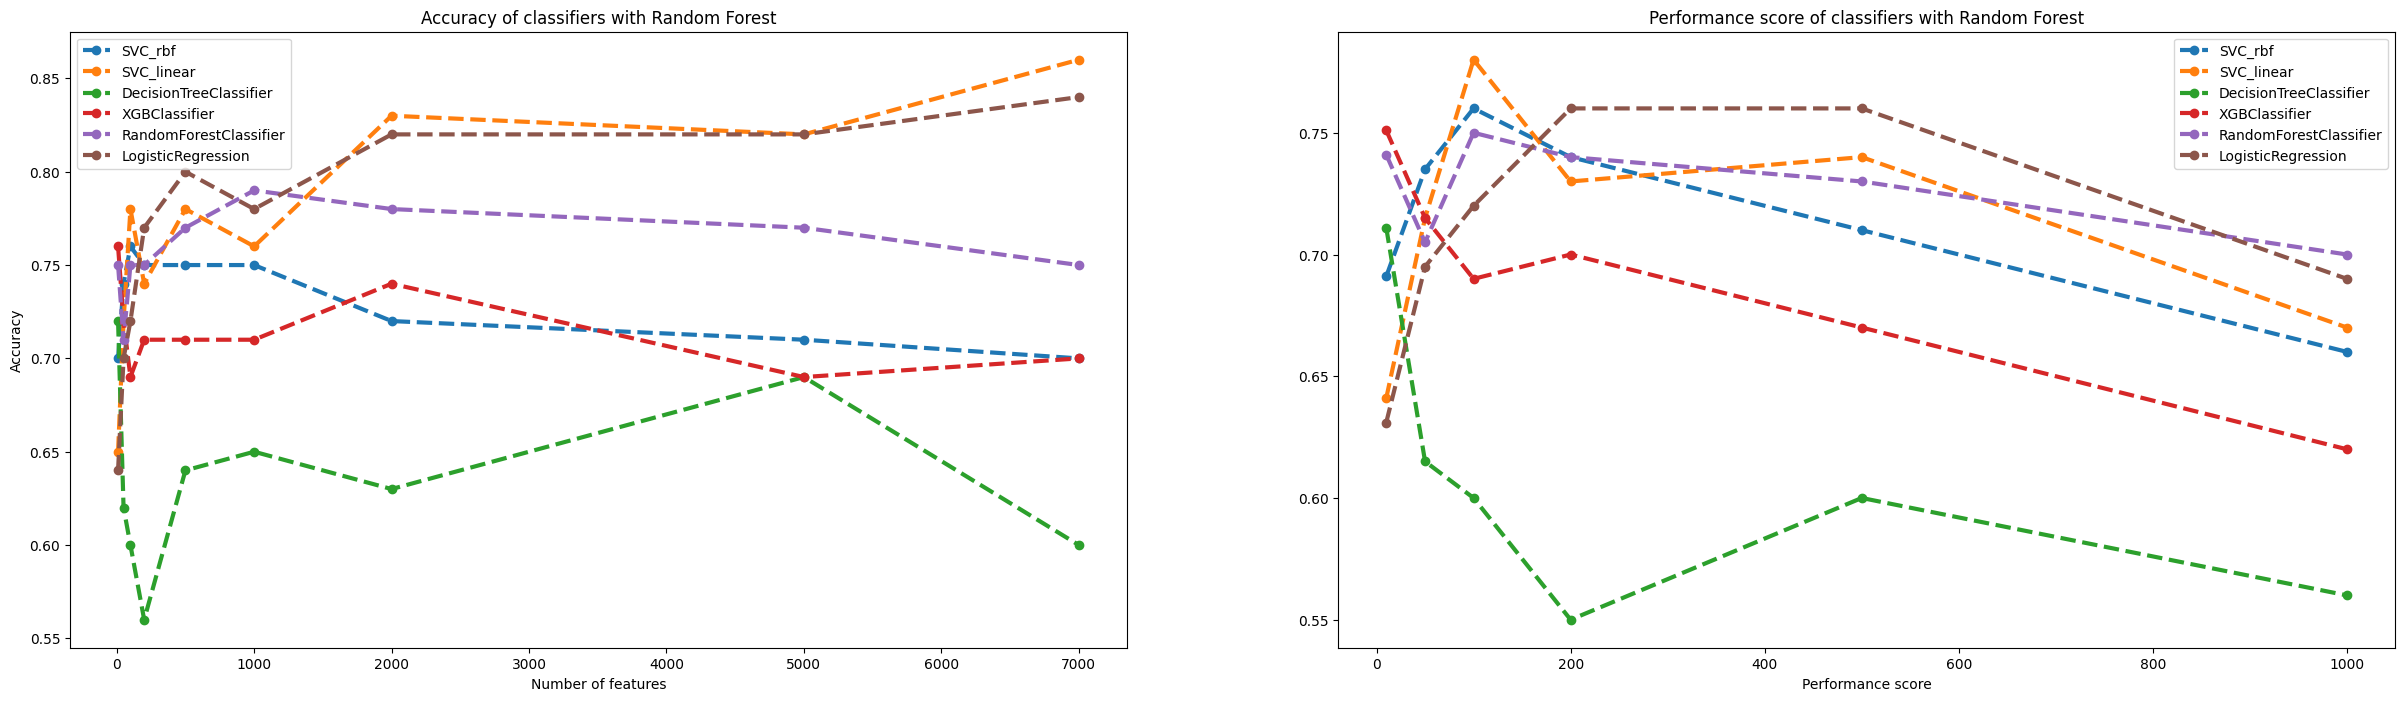

In [10]:
prepare_plot('data/forest.csv', 'Random Forest')

Interesting observation about this plot is how the accuracy of SVM changes depending on kernel choice. We can see that with increasing number of features SVM with `linear` gets stronger, as SVM with `rbf` kernel weakens its predictions. Another observation is that as accuracy of SVM with linear kernel grows with number of features, the overall performance score peaks at around 100 features, where a good balance between accuracy and model complexity is found.  

# Corr, mutual

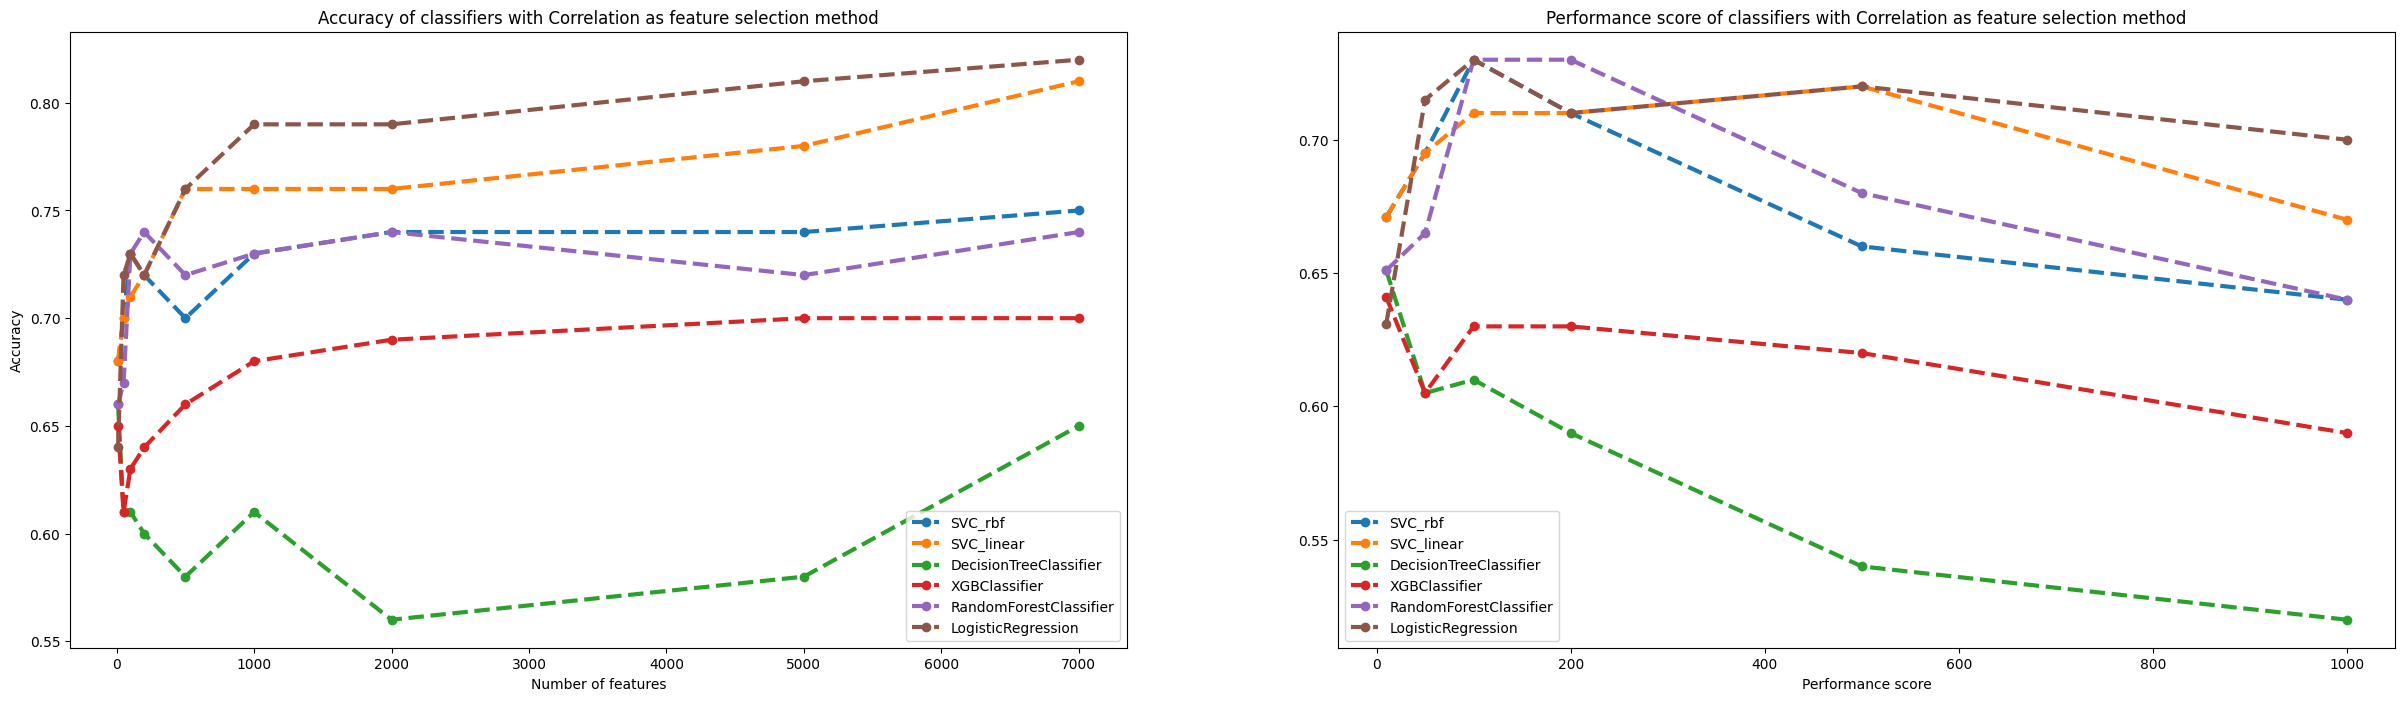

In [11]:
prepare_plot('data/corr.csv', 'Correlation as feature selection method')

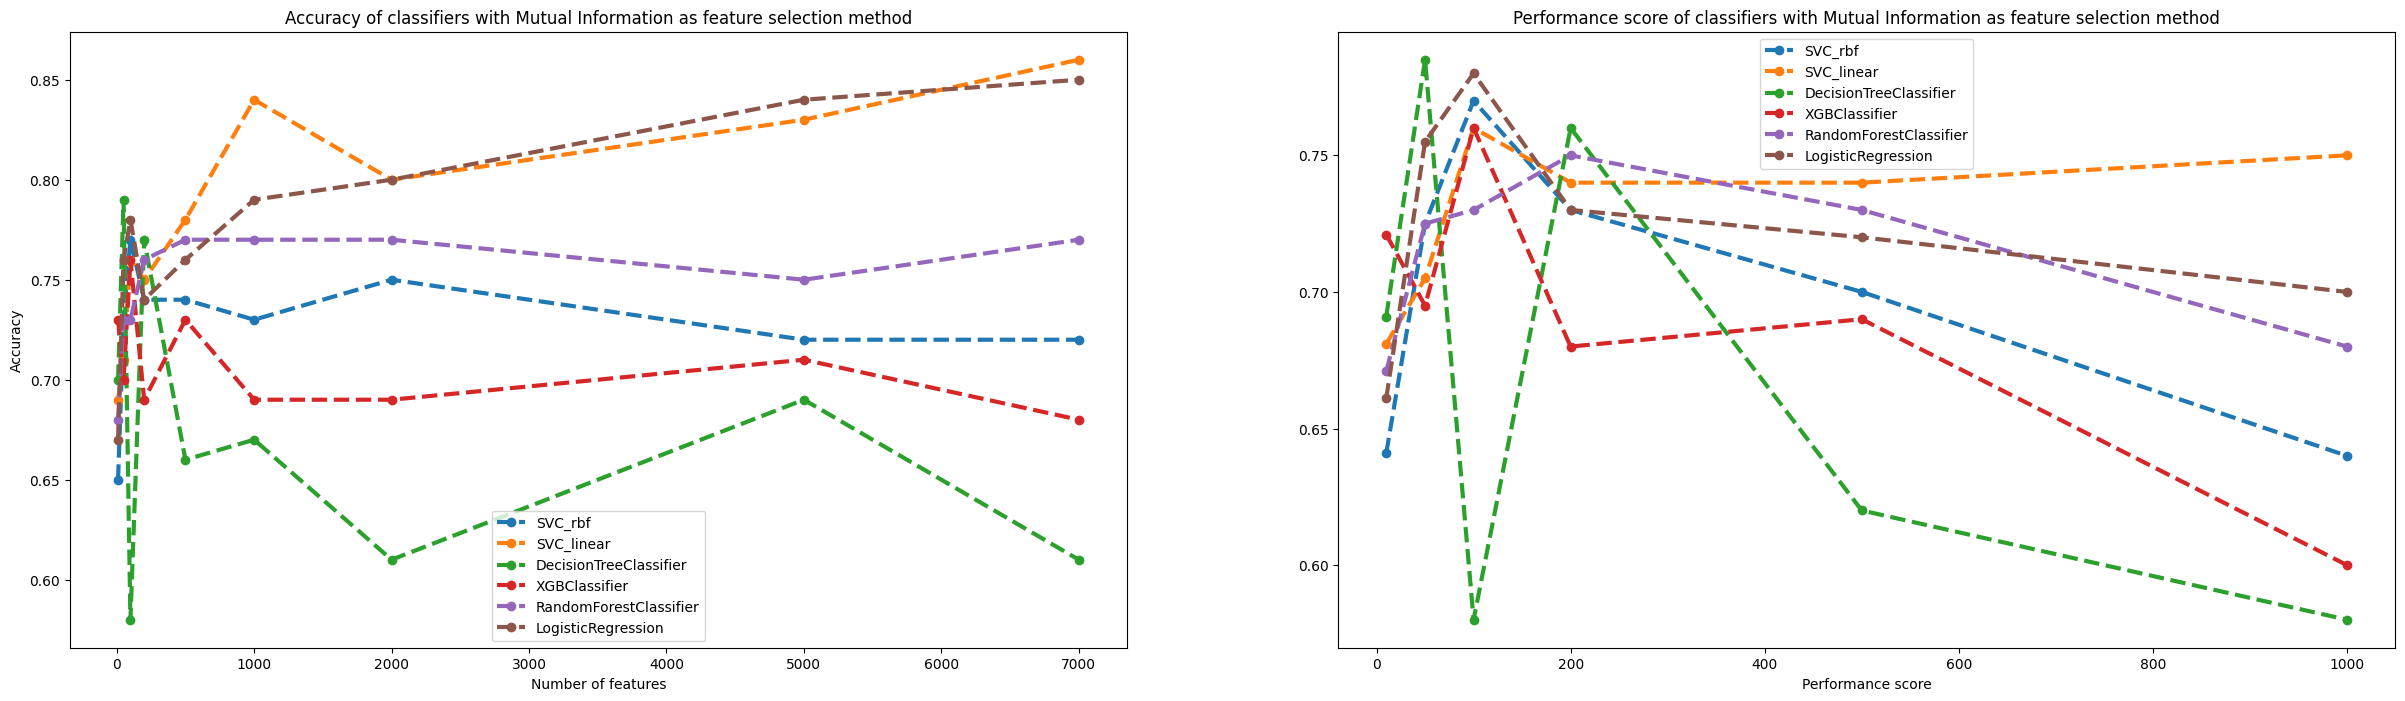

In [12]:
prepare_plot('data/mutual.csv', 'Mutual Information as feature selection method')

Filtering methods, such as correlation or mutual information filtering are very fast in terms of computing time and give reasonably good results. The method based on feature correlation also seems to be one of the most stable methods out of all, with respect to increasing number of features. If we exclude the PCA (which might be considered more of a feature extraction method than feature selection), the best results were obtained with the Mutual Information feature selection method.

# Anova, chi2

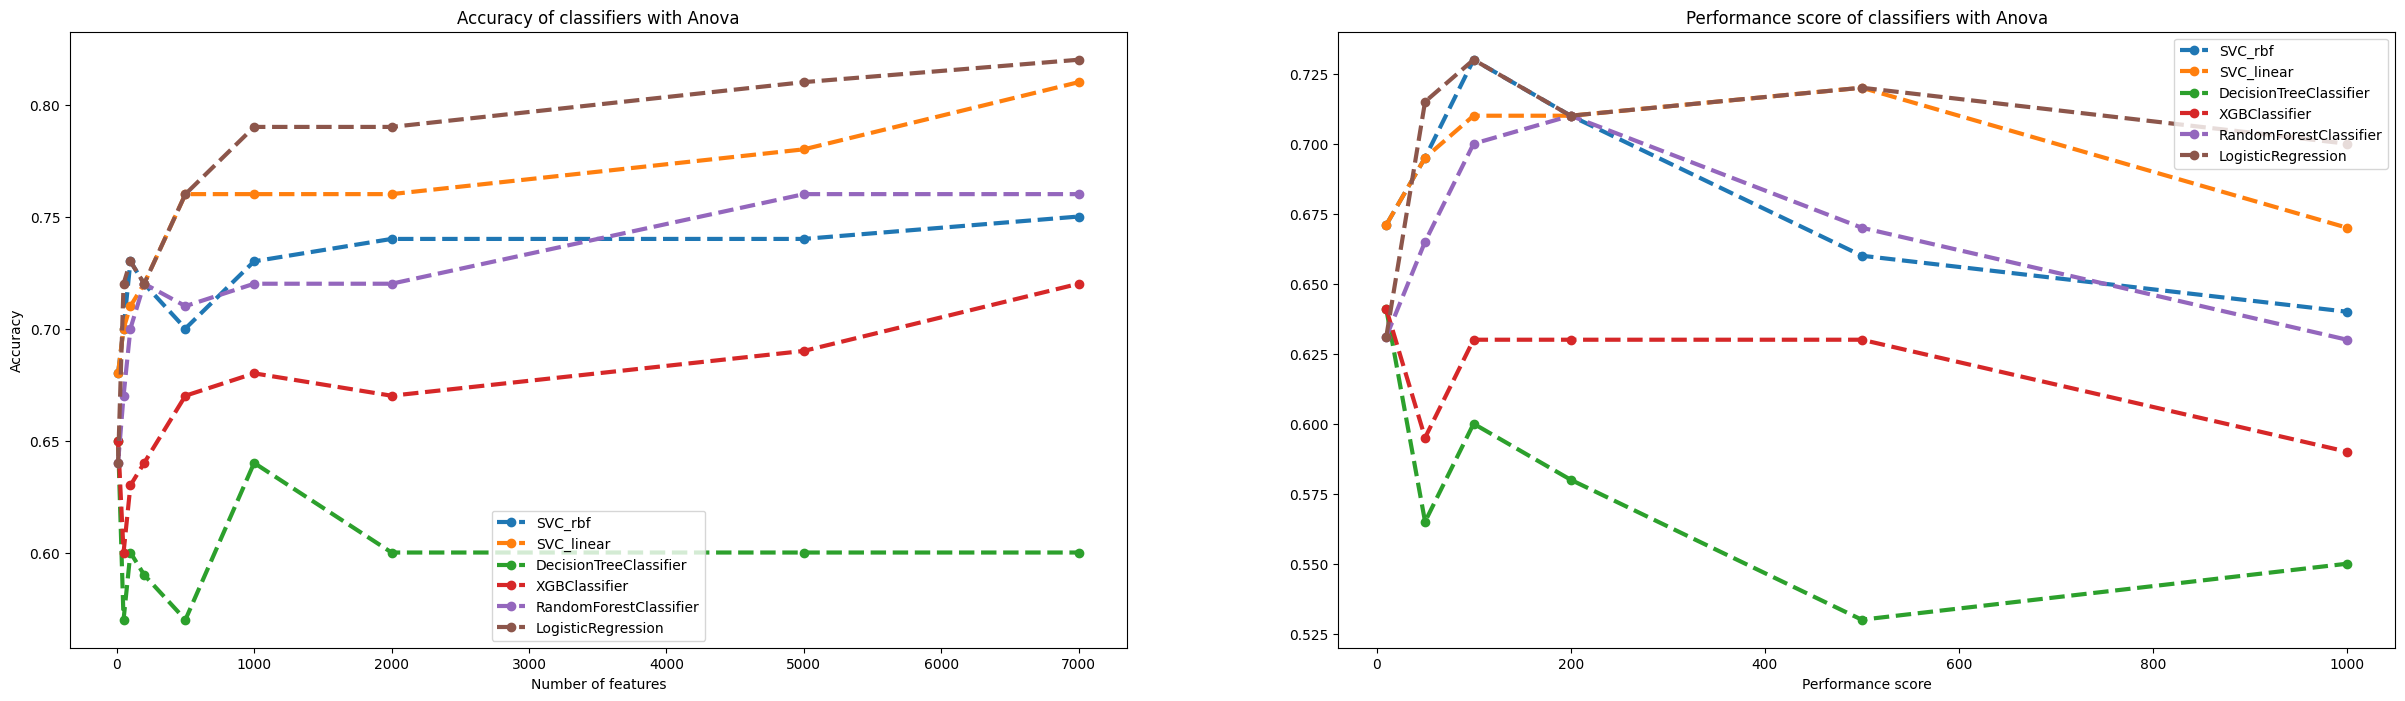

In [13]:
prepare_plot('data/anova.csv', 'Anova')

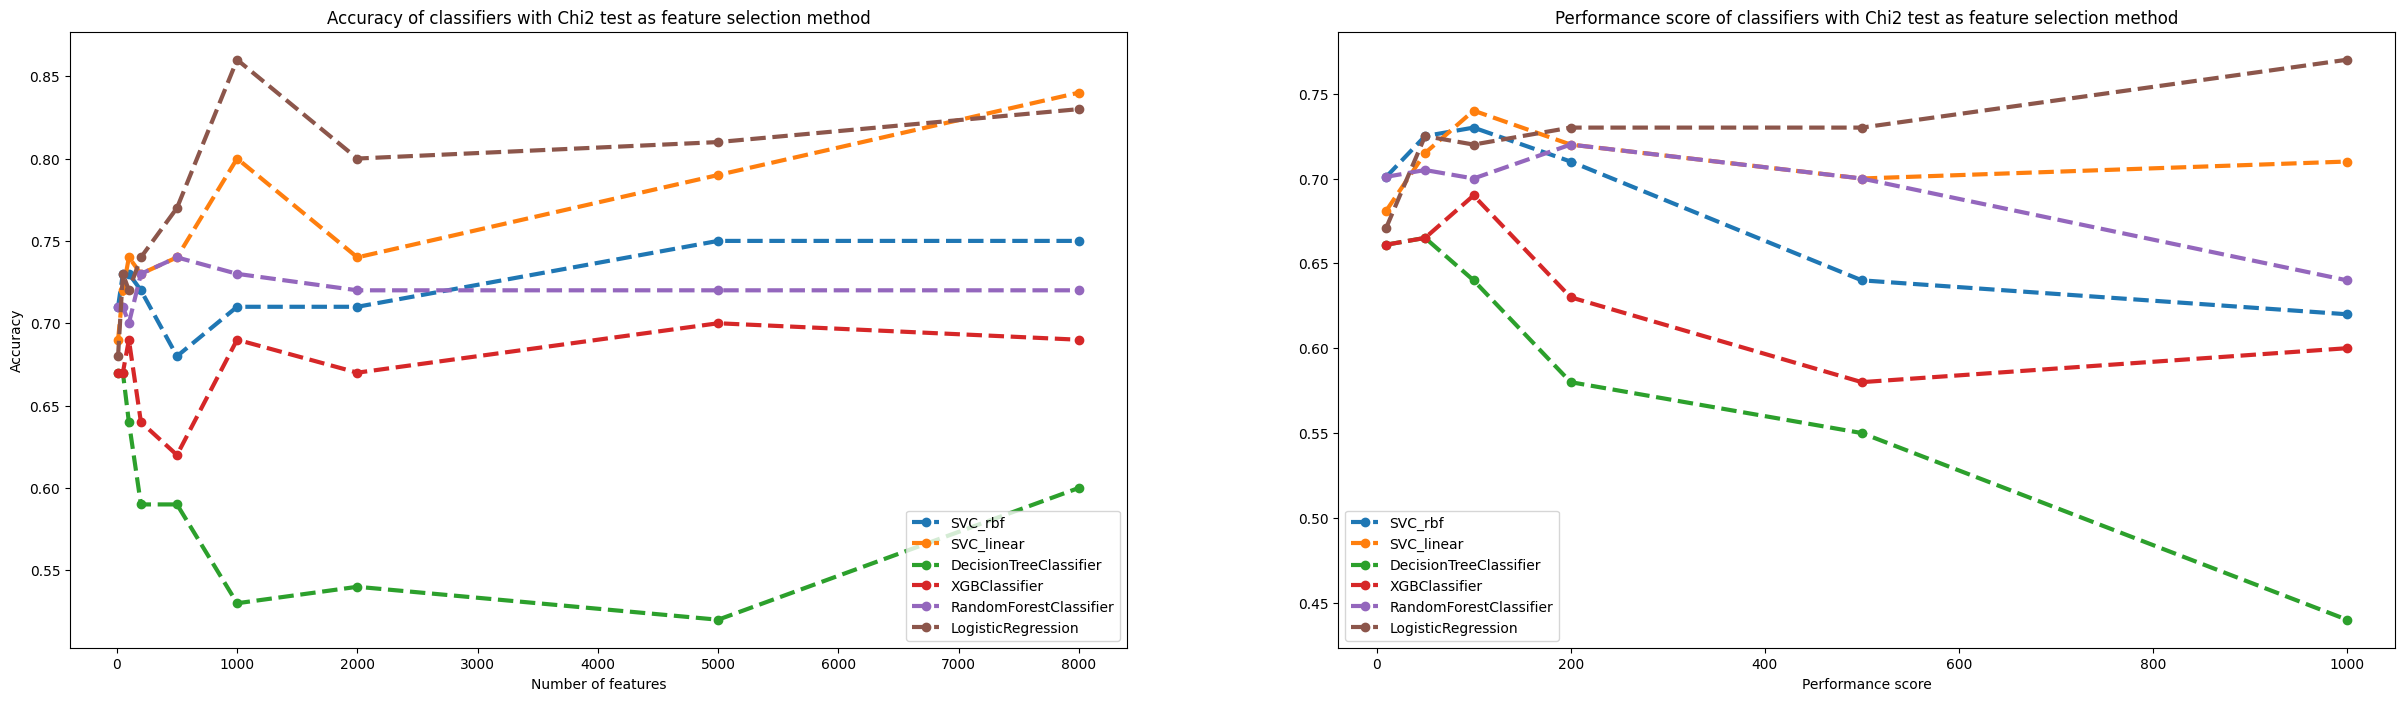

In [14]:
prepare_plot('data/chi2.csv', 'Chi2 test as feature selection method')

Feature selection with chi2 test gives interesting result, as it is the only method where performance score peaks at 1000 features. Usually 1000 features give too big of a penalty to the overall score, but in this case it seems to be the best choice.

# Boruta 

Text(0.5, 1.0, 'Performance score of classifiers with Boruta')

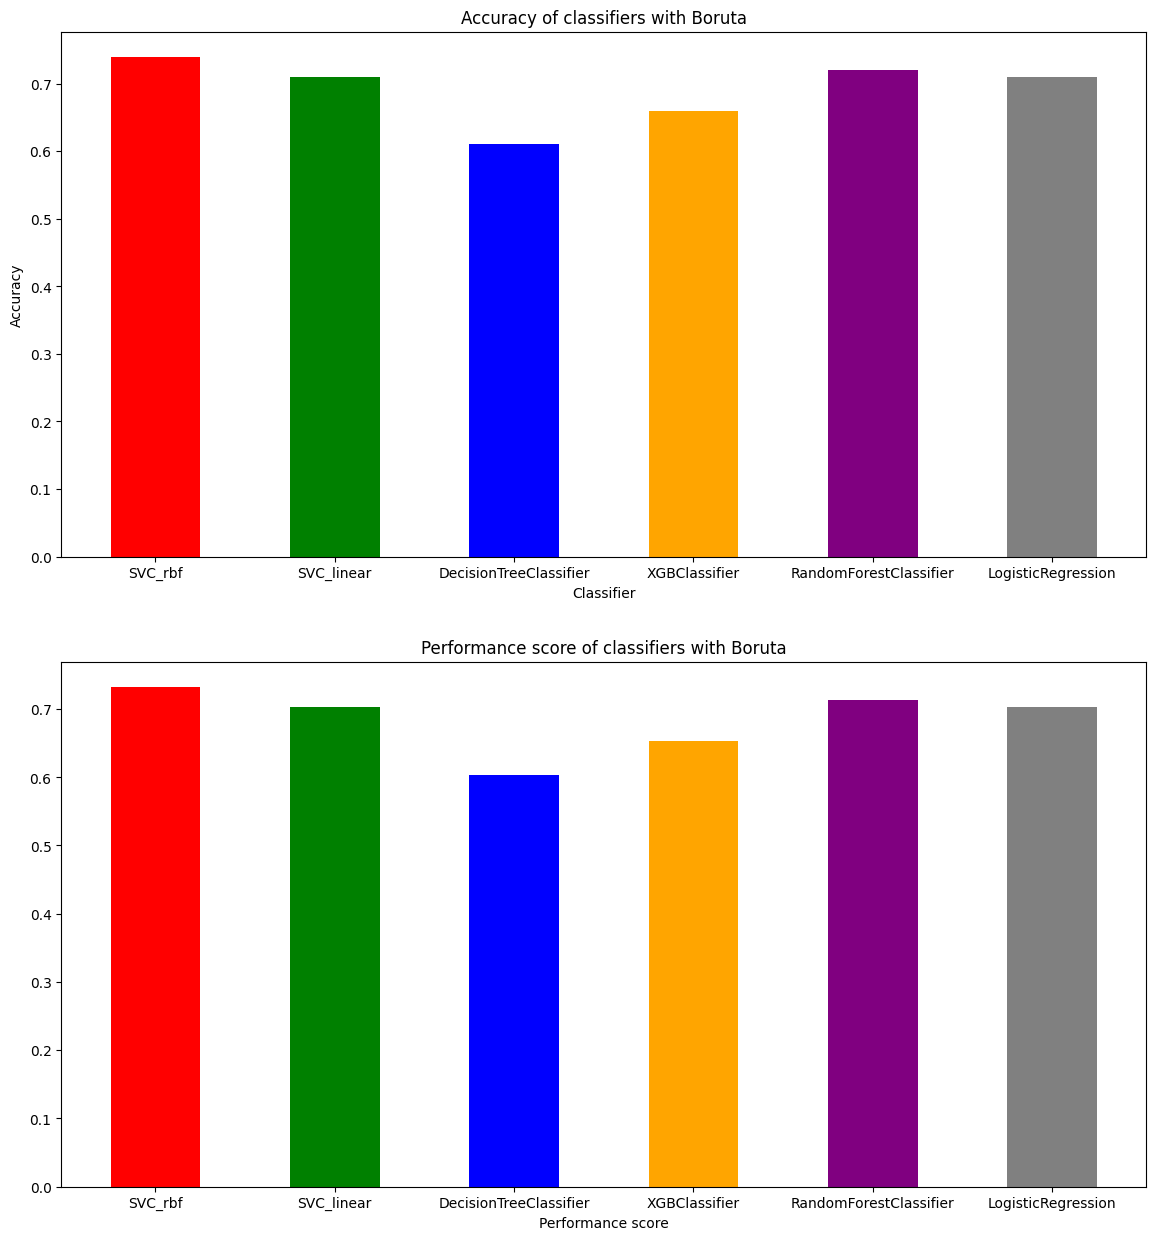

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 15))
df = pd.read_csv('data/boruta.csv')
colors = ['red', 'green', 'blue', 'orange', 'purple', 'grey']
ax[0].bar(df['Classifier'], df['Accuracy'], label='accuracy', width=0.5, color=colors)
ax[1].bar(df['Classifier'], df['Performance_score'], label='performance score', width=0.5, color=colors)
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('Classifier')
ax[1].set_xlabel('Performance score')
ax[0].set_title(f'Accuracy of classifiers with Boruta')
ax[1].set_title(f'Performance score of classifiers with Boruta')

Boruta algorithm appeared to be very strict feature selection method, meaning that it chose small amount of features (around 30). This means that the overall accuracy of models was not great, but the performance score was above average, due to small number of selected features.

# Special techniques - stack (random forest selector + Backward search) and ensemble (random forest selector, anova, chi2, corr, mutual)

## Stack

Text(0.5, 1.0, 'Performance score of classifiers with Stack (random forest selector + RFE)')

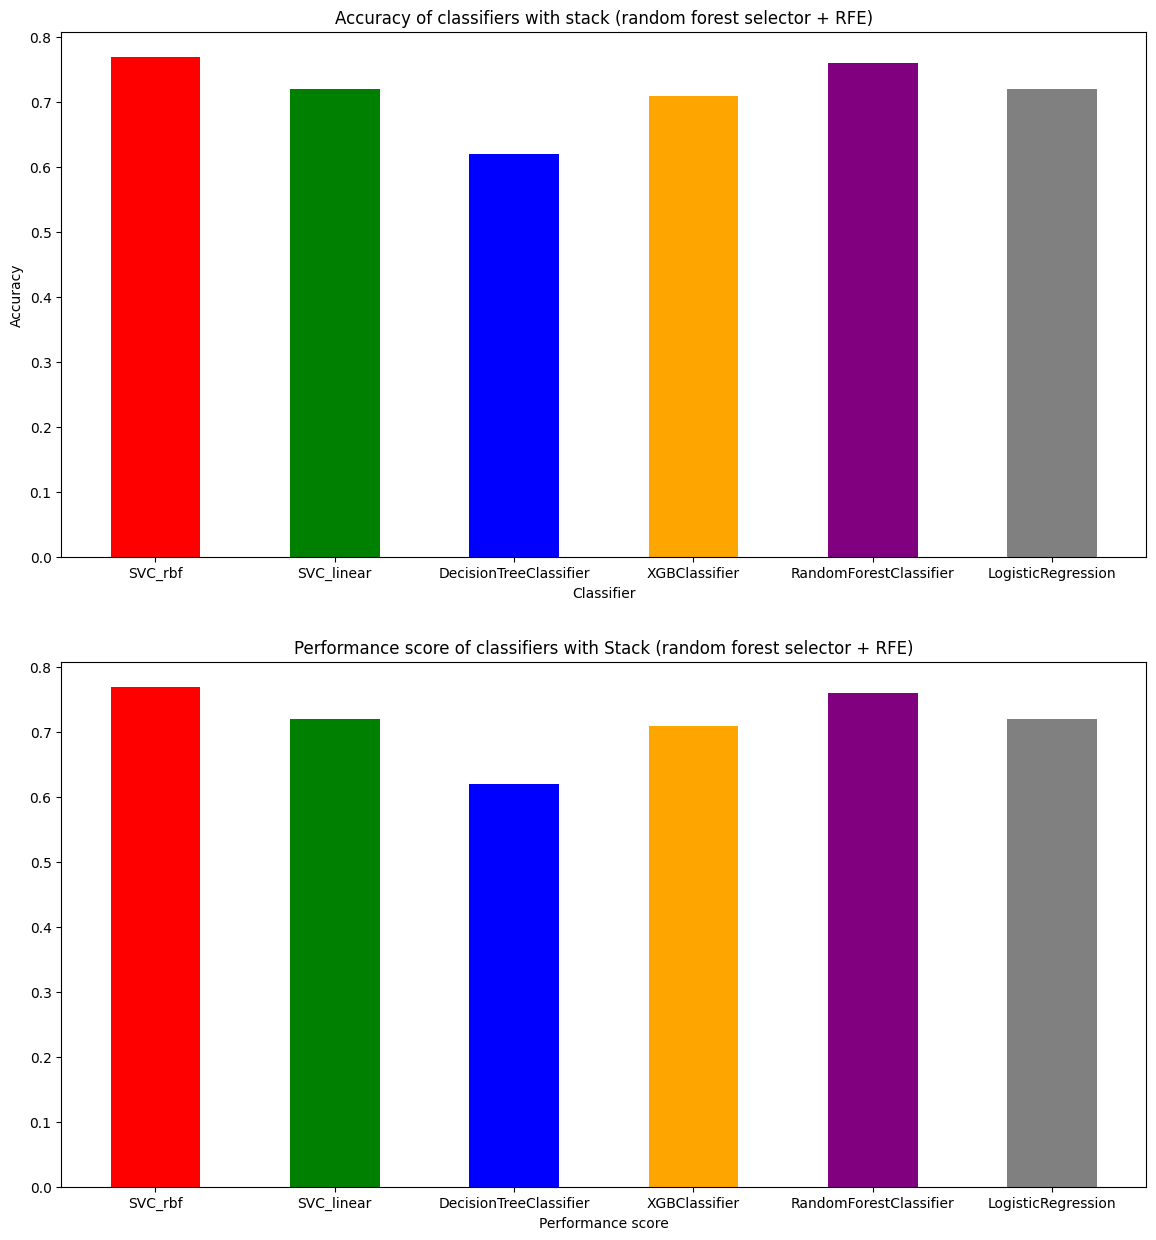

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 15))
df = pd.read_csv('data/stack.csv')
colors = ['red', 'green', 'blue', 'orange', 'purple', 'grey']
ax[0].bar(df['Classifier'], df['Accuracy'], label='accuracy', width=0.5, color=colors)
ax[1].bar(df['Classifier'], df['Performance_score'], label='performance score', width=0.5, color=colors)
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('Classifier')
ax[1].set_xlabel('Performance score')
ax[0].set_title(f'Accuracy of classifiers with stack (random forest selector + RFE)')
ax[1].set_title(f'Performance score of classifiers with Stack (random forest selector + RFE)')

As we know, recursive feature elimination method (RFE) can be very effective as a greedy algorithm, but very time consuming. Therefore I decided to combine it with other feature selection method to reduce its computational cost. First of all I use Random Forest Selector to choose 500 best features out of 10 000 and then the RFE instance chooses 100 best features out of these 500. I expected it to give better results than a single selection method, but it turns out that it is not that effective - giving around 77% of accuracy and performance score.

## Ensemble

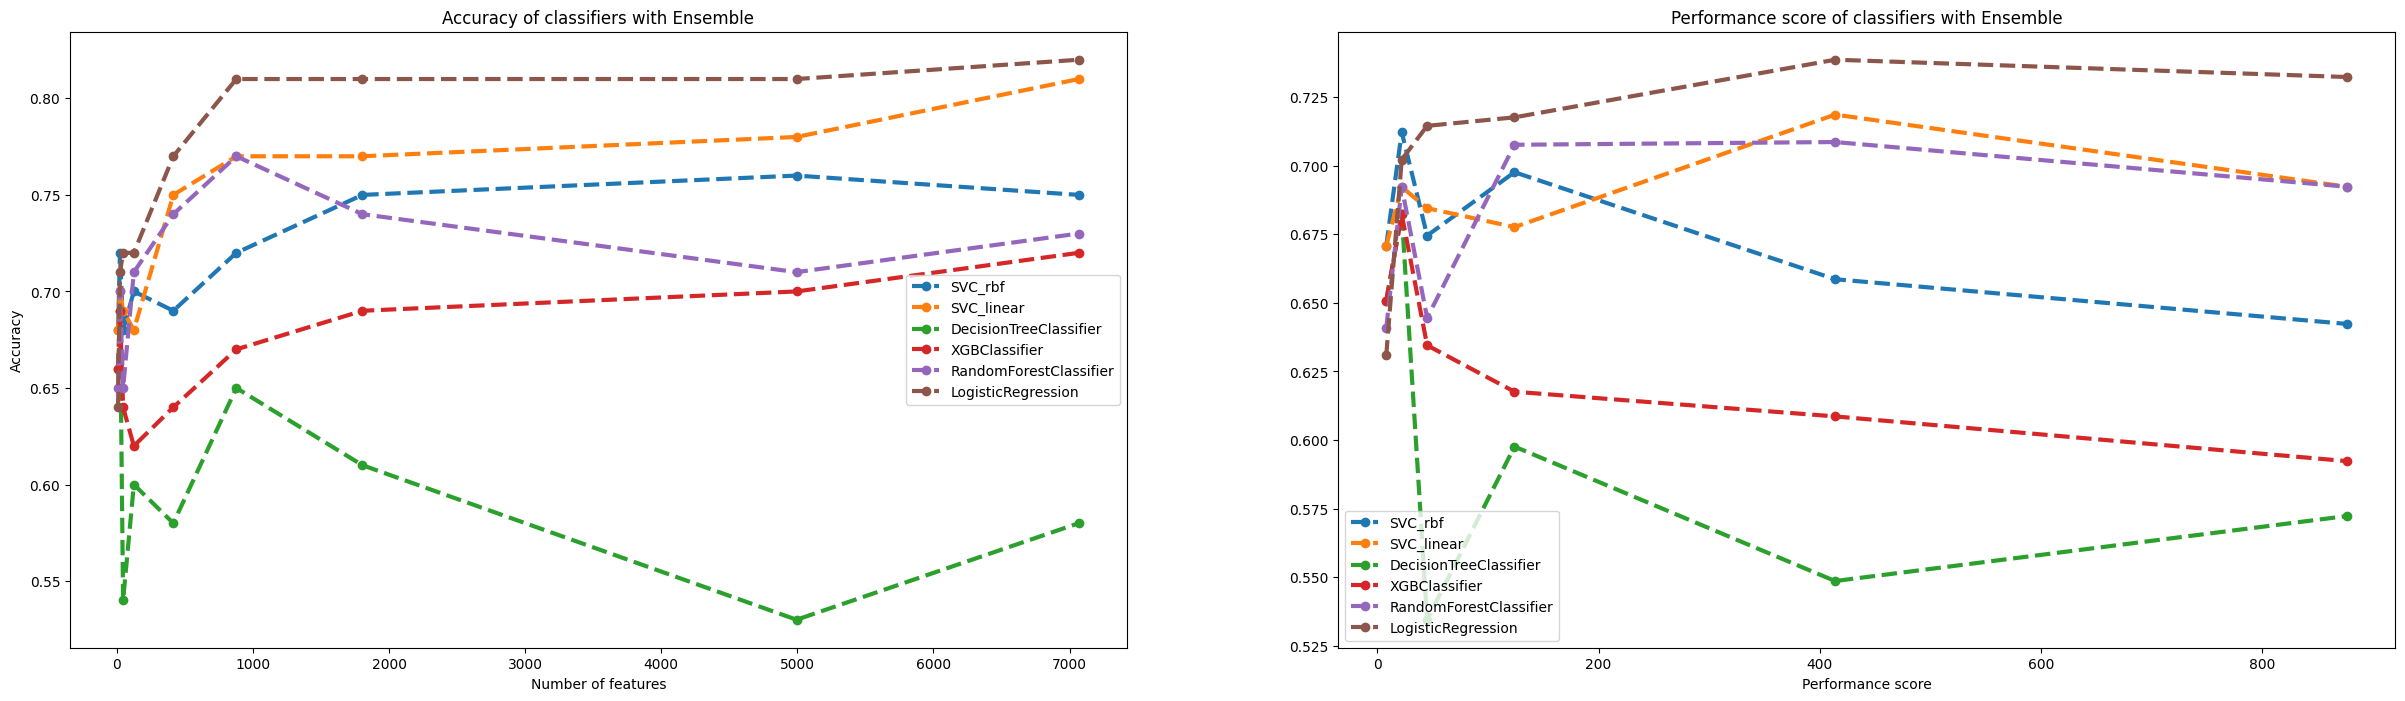

In [15]:
prepare_plot('data/ensemble.csv', 'Ensemble')

The last experiment was an application of ensemble to the feature seleciton task. I combine different selection methods (random forest selector, correlation selector, mutual information selector, chi2 and anova tests) and using majority voting select best features. As we can see, the ensemble gives average accuracy and performance scores and it underperformed considering my prior expectations.